In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Loading Dependencies

Includes
- Tensorflow_hub : Place where all tensorflow pretrained models are stored.
- Pandas : For data loading, manipulation and wrangling.
- Tensorflow_text : Allows addditional NLP text processing capablities outside scope of tensorflow
- Sklearn : For doing data evaluation and splitting
- Matplotlib : For visualization

In [2]:
# installing tensorflow_text
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 15.0 MB/s 
     |████████████████████████████████| 588.3 MB 6.2 kB/s 
     |████████████████████████████████| 1.7 MB 56.4 MB/s 
     |████████████████████████████████| 6.0 MB 50.9 MB/s 
     |████████████████████████████████| 439 kB 70.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1

In [3]:
import tensorflow_hub as hub
import pandas as pd
import tensorflow_text as text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Loading Data

- Read Data
- Display data
USING PANDAS

In [4]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [5]:
import io
#Loading the data
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# Data Analysis

- Check the description by grouping by category :
* no of data points for each category - count
* no of unique values in each category - unique




In [7]:
# check count and unique and top values and their frequency
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [8]:
df.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

**Clearly dataset is imbalanced - not so much but still it can affect our model. Need to use some type of regulariztion like downsampling dataset for mazority class**

# Downsampling Dataset 

**Includes:**
- Check percentage of unbalances.
- Creating 2 new dataframes out of existing one.
- Taking any random minority no of samples - `(747)` for majority class`(4825)`.
- Creating a balanced dataset by concating 2 new data frames.

In [10]:
# check percentange of data - states how much data needs to be balanced
str(round(747/4825,2))+'%'

'0.15%'

In [11]:
# creating 2 new dataframe as df_ham , df_spam

df_spam = df[df['Category']=='spam']
print("Spam Dataset Shape:", df_spam.shape)

df_ham = df[df['Category']=='ham']
print("Ham Dataset Shape:", df_ham.shape)

Spam Dataset Shape: (747, 2)
Ham Dataset Shape: (4825, 2)


In [12]:
# downsampling ham dataset - take only random 747 example
# will use df_spam.shape[0] - 747

df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [13]:
# concating both dataset - df_spam and df_ham_balanced to create df_balanced dataset
df_balanced = pd.concat([df_spam , df_ham_downsampled])
df_balanced.head()

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [14]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [15]:
df_balanced.sample(10)

,Category,Message
5214,spam,Natalja (25/F) is inviting you to be her frien...
2534,ham,Glad it went well :) come over at 11 then we'l...
4362,ham,"Don't Think About ""What u Have Got"" Think Abou..."
4879,spam,No 1 POLYPHONIC tone 4 ur mob every week! Just...
1739,ham,K go and sleep well. Take rest:-).
1997,ham,Lol boo I was hoping for a laugh
3747,ham,I'm not. She lip synced with shangela.
117,spam,You are a winner U have been specially selecte...
4759,spam,URGENT! Your Mobile number has been awarded wi...
3671,ham,Ok thanx... Take care then...


# Data Preparation



1. Create Numerical Repersentation Of Category - One hot encoding
* Create a new column
* Use `df[col].apply(lambda function)`
* Lambda Function - if spam return 1, else return 0 (for ham) - ternary operators : [`lambda x : value expression else value`]

In [16]:
# creating numerical repersentation of category - one hot encoding
df_balanced['spam'] = df_balanced['Category'].apply(lambda x:1 if x=='spam' else 0)

In [17]:
# displaying data - spam -1 , ham-0
df_balanced.sample(4)

,Category,Message,spam
1128,ham,"Height of ""Oh shit....!!"" situation: A guy thr...",0
3605,ham,Hey morning what you come to ask:-) pa...,0
1381,ham,i dnt wnt to tlk wid u,0
650,spam,"You have won ?1,000 cash or a ?2,000 prize! To...",1


2. Do train-test split
* split dataset into 80-20 ratio with 80% train and remaing as test
* for eveness of data we will use `stratify` agrument which ensures same ratio of both category is loaded for each case, even if one categoy has more training samples - prevents overfitting 

Store our data in: 
- `X_train, y_train` - traininge set(training_data and labels respectively)
- `X_test,, y_test` - testing set(testing_data and labels)

In [18]:
# loading train test split
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test , y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['spam'],
                                                    stratify = df_balanced['spam'], train_size=0.7, test_size=0.3)

In [20]:
# check for startification
y_train.value_counts()

1    523
0    522
Name: spam, dtype: int64

In [21]:
560/560

1.0

In [22]:
y_test.value_counts()

0    225
1    224
Name: spam, dtype: int64

In [23]:
187/187

1.0

***-> Almost similar, means data is downsampled now ***

# Model Creation 

## Downloading BERT

Model specification : 
- Layers - 12
- Hidden layers - 768 - embedding size
- Attention - 12
Name - Bert Small
---
This model has 2 parts:
- Bert_preprocessor - preprocess the text to be BERT ready
- Bert_encoder - do the actual encoding
---
Steps:
> Preprocessor
* create a keras hub layer from the preprocessing url 

> Encoder
* create a keras hub layer from the encoder/ model url



In [24]:
# downloading preprocessing files and model
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

## Process And Encode Data

Use functional API to process and encode data in the layers itself

- Create a input layers with shape() , type - tf.string, and layer name - text - `TEXT_INPUT`

- Pass TEXT_INPUT into bert_prerocessor - `PREPROCESSED TEXT[*]`
- Pass the above[*] to encoder - `EMBED1`
- pass pooled_outputs of EMBEED to dropout layer - `DROPOUT`
- create a dense layer with activation as `sigmoid` `OUTPUTS`
- Create out MODEL (inputs - text_input, outputs - dropout) 

In [25]:
import tensorflow as tf

In [26]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
print("Text Input: ",text_input,"\n")
preprocessed_text = bert_preprocessor(text_input)
print("Pre-processed text: ",preprocessed_text,"\n")
embed1 = bert_encoder(preprocessed_text)
print("Encoding on pre-processed text: ",embed1,"\n")
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embed1['pooled_output'])
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Dense')(dropout)

# creating final model
final_model = tf.keras.Model(inputs = [text_input], outputs = [outputs])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Text Input:  KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.string, name='Inputs'), name='Inputs', description="created by layer 'Inputs'") 

Pre-processed text:  {'input_word_ids': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer')>, 'input_mask': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer')>, 'input_type_ids': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer')>} 

Encoding on pre-processed text:  {'encoder_outputs': [<KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 768) dtype=

In [27]:
# check summary of model
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['Inputs[0][0]']                 
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

##  Compiling model

- Optimizer - ADAM
- Loss - binary_crossentropy
- metrics - accuracy , precesion and recall

In [29]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

final_model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [30]:
#@title Optional 
# optional - defining tensorflow callbacks
import tensorflow as tf
import datetime
%load_ext tensorboard

!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [34]:
history = final_model.fit(X_train, y_train, epochs = 20 , callbacks = [tensorboard_callback])

Epoch 1/20
33/33 [==============================] - 30s 906ms/step - loss: 0.7287 - accuracy: 0.5455 - precision: 0.5420 - recall: 0.5927
Epoch 2/20
33/33 [==============================] - 27s 834ms/step - loss: 0.5746 - accuracy: 0.7388 - precision: 0.7520 - recall: 0.7132
Epoch 3/20
33/33 [==============================] - 28s 851ms/step - loss: 0.5036 - accuracy: 0.8144 - precision: 0.8098 - recall: 0.8222
Epoch 4/20
33/33 [==============================] - 27s 845ms/step - loss: 0.4410 - accuracy: 0.8584 - precision: 0.8453 - recall: 0.8776
Epoch 5/20
33/33 [==============================] - 27s 836ms/step - loss: 0.4084 - accuracy: 0.8679 - precision: 0.8519 - recall: 0.8910
Epoch 6/20
33/33 [==============================] - 27s 842ms/step - loss: 0.3739 - accuracy: 0.8861 - precision: 0.8700 - recall: 0.9082
Epoch 7/20
33/33 [==============================] - 27s 844ms/step - loss: 0.3580 - accuracy: 0.8976 - precision: 0.8824 - recall: 0.9178
Epoch 8/20
33/33 [================

# Model Evaluation 

- Evaulating model performance 
using `model.evaluate(X_test, y_test)`

- Predicting X_test - `y_pred`
-- Checking its values as 1 or 0 
- Getting Confusion matrix
-- Flattening y_pred 
-- Ploting consufion matrix

- Getting classification report 

In [36]:
# Evaluating performace
final_model.evaluate(X_test,y_test)

15/15 [==============================] - 8s 338ms/step - loss: 0.2229 - accuracy: 0.9376 - precision: 0.9261 - recall: 0.9509


[0.22291046380996704,
 0.9376391768455505,
 0.926086962223053,
 0.9508928656578064]

In [37]:
# getting y_pred by predicting over X_text and flattening it
y_pred = final_model.predict(X_test)
y_pred = y_pred.flatten() # require to be in one dimensional array , for easy maniputation

15/15 [==============================] - 6s 337ms/step


In [38]:
# checking the results y_pred
import numpy as np

y_pred = np.where(y_pred>0.5,1,0 )
y_pred 

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [39]:
# importing consfusion maxtrix
from sklearn.metrics import confusion_matrix , classification_report

In [40]:
# creating confusion matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[208,  17],
       [ 11, 213]])

In [41]:
# plotting as graph - importing seaborn
import seaborn as sns

Text(33.0, 0.5, 'Actual value')

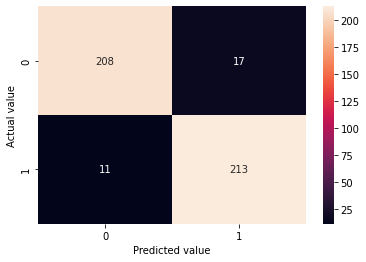

In [53]:
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [43]:
# printing classification report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       225
           1       0.93      0.95      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



**Good Precesion And Recall Score, but can be improved** 

# Model Prediction

- We will be predicting data on text coprus,
value > 5 is most likely be `spam`

In [66]:
prediction_test_sentences = [
                #ham
                'The article was published on 120h December.',
                'Please let me know when you will be free to make it to Bangalore.',
                'Although we are unable to give you an exact time-frame at the moment, I would request you to stay tuned for any updates.',
                

                # Spam
                'Your account will be blocked unless you cange your password using the link below. Please log in to to secure your account and prevent deactivation ',
                'Congratulations! You have won Rs.1,00,000 from the ABC lottery. Please click on the link below to avail the prize money', 
                'Amazon is sending you a refund of Rs.8000 for the product returned previoulsy. Please reply with your bank account details to verify and get your refund'
]

In [67]:
test_results = final_model.predict(prediction_test_sentences)

1/1 [==============================] - 0s 47ms/step


In [68]:
output = np.where(test_results>0.5,'spam', 'ham') 

In [69]:
output

array([['ham'],
       ['ham'],
       ['ham'],
       ['spam'],
       ['spam'],
       ['spam']], dtype='<U4')